In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *

In [3]:
data, lc_info = import_lightcurve("betapic/fits/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits")

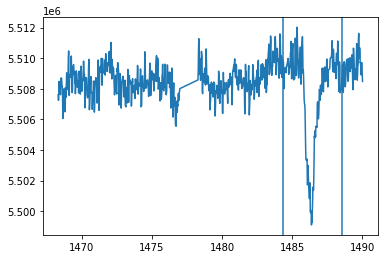

In [4]:
plt.plot(data['TIME'],data['PDCSAP_FLUX'])
plt.axvline(data['TIME'][700])
plt.axvline(data['TIME'][900])

---

## Method 1:

In [5]:
time = data['TIME'][700:900]
flux = normalise_flux(data['PDCSAP_FLUX'][700:900])

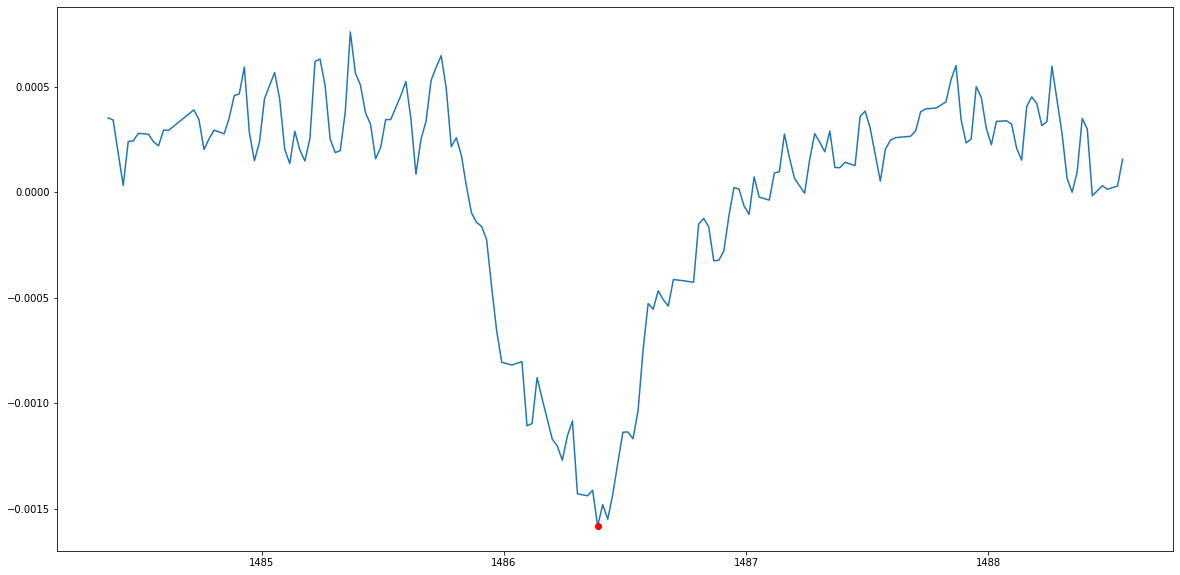

In [6]:
plt.figure(figsize=(20,10))
plt.plot(time,flux)
plt.plot(time[96],flux.min(),'ro') 
#plt.plot(time[96:96+len(np.flip(flux[0:96].data))],np.flip(flux[0:96].data))

In [7]:
min_flux_ind = np.argmin(flux)

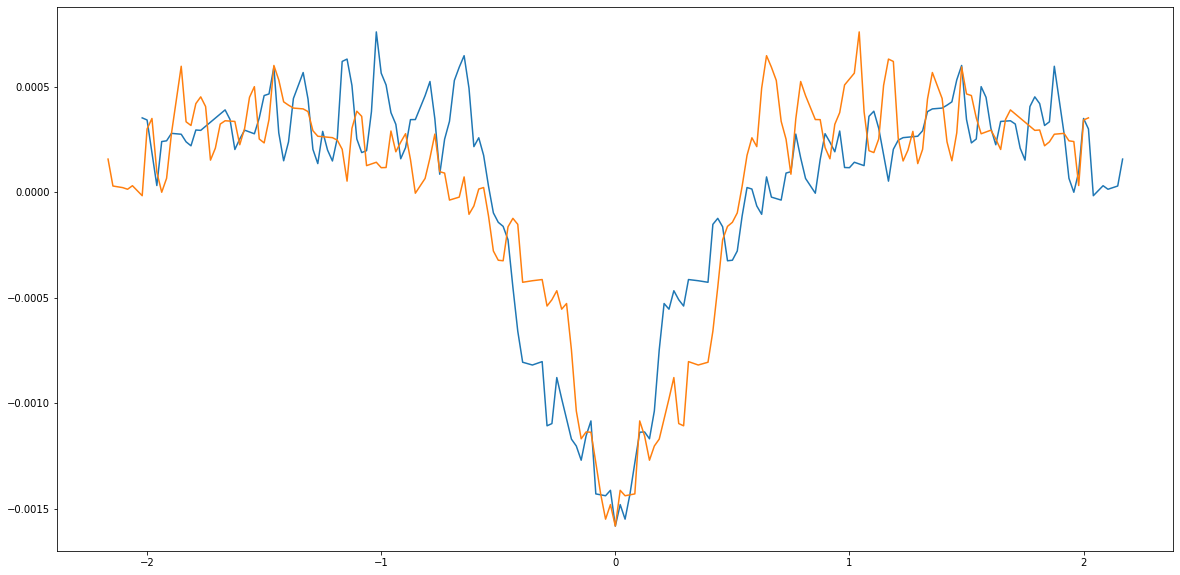

In [8]:
plt.figure(figsize=(20,10))
plt.plot(time - time[min_flux_ind],flux)
plt.plot(time[::-1]-time[np.argmin(flux[::-1])],flux)

In [9]:
x_forward = time - time[min_flux_ind]
y_forward = flux

In [10]:
x_backward = (time[::-1]-time[np.argmin(flux[::-1])])[::-1]
y_backward = flux[::-1]

In [11]:
from wotan import flatten

In [12]:
plt.plot(x_forward,flatten_lc)

NameError: name 'flatten_lc' is not defined

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(x_forward,y_forward)
plt.plot(x_backward,y_backward)

In [ ]:
t = np.linspace(-2,2,5000)

In [ ]:
diff = np.interp(t,x_forward,y_forward) - np.interp(t,x_backward,y_backward)

In [ ]:
plt.plot(t,np.interp(t,x_forward,y_forward))
plt.plot(t,np.interp(t,x_backward,y_backward))

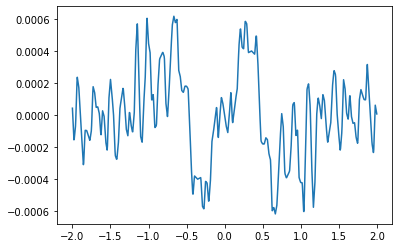

In [96]:
plt.plot(t,diff)

---

## Method 2:

In [112]:
min_ind = np.argmin(flux)

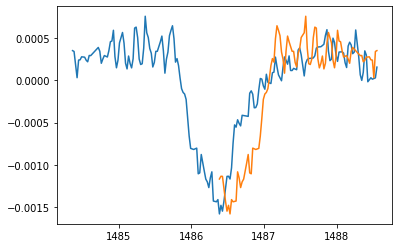

In [123]:
plt.plot(time,flux)
plt.plot(time[min_ind:],np.flip(flux[:min_ind+8]))